In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [7]:
json_file_path = "MC3_graph.json"
with open(json_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

In [ ]:
data

In [9]:
print(f"Tipo de datos: {type(data)}")

Tipo de datos: <class 'dict'>


In [10]:
print("Claves principales del JSON:")
for clave in data.keys():
    print(f"  - {clave}")

Claves principales del JSON:
  - directed
  - multigraph
  - graph
  - nodes
  - edges


In [17]:
data['directed']

True

In [ ]:
data['graph']

{'mode': 'static',
 'edge_default': {},
 'node_default': {},
 'name': 'VAST_MC3_Knowledge_Graph'}

In [14]:
data['graph']['mode']

'static'

In [15]:
print(f"\nNombre del grafo: {data['graph']['name']}")
print(f"¿Es dirigido?: {data['directed']}")
print(f"¿Es multigrafo?: {data['multigraph']}")
print(f"Total de nodos: {len(data['nodes'])}")


Nombre del grafo: VAST_MC3_Knowledge_Graph
¿Es dirigido?: True
¿Es multigrafo?: False
Total de nodos: 1159


In [19]:
df_nodos = pd.DataFrame(data['nodes'])

In [22]:
df_nodos.head()

,type,label,name,sub_type,id,timestamp,monitoring_type,findings,content,assessment_type,...,friendship_type,permission_type,start_date,end_date,report_type,submission_date,jurisdiction_type,authority_level,coordination_type,operational_role
0,Entity,Sam,Sam,Person,Sam,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Entity,Kelly,Kelly,Person,Kelly,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entity,Nadia Conti,Nadia Conti,Person,Nadia Conti,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Entity,Elise,Elise,Person,Elise,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Entity,Liam Thorne,Liam Thorne,Person,Liam Thorne,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print(f"Forma del DataFrame: {df_nodos.shape}")  # (filas, columnas)
print(f"Columnas disponibles: {list(df_nodos.columns)}")

Forma del DataFrame: (1159, 31)
Columnas disponibles: ['type', 'label', 'name', 'sub_type', 'id', 'timestamp', 'monitoring_type', 'findings', 'content', 'assessment_type', 'results', 'movement_type', 'destination', 'enforcement_type', 'outcome', 'activity_type', 'participants', 'thing_collected', 'reference', 'date', 'time', 'friendship_type', 'permission_type', 'start_date', 'end_date', 'report_type', 'submission_date', 'jurisdiction_type', 'authority_level', 'coordination_type', 'operational_role']


In [23]:
df_nodos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               1159 non-null   object 
 1   label              1159 non-null   object 
 2   name               72 non-null     object 
 3   sub_type           1159 non-null   object 
 4   id                 1159 non-null   object 
 5   timestamp          770 non-null    object 
 6   monitoring_type    70 non-null     object 
 7   findings           70 non-null     object 
 8   content            584 non-null    object 
 9   assessment_type    33 non-null     object 
 10  results            32 non-null     object 
 11  movement_type      33 non-null     object 
 12  destination        41 non-null     object 
 13  enforcement_type   21 non-null     object 
 14  outcome            19 non-null     object 
 15  activity_type      4 non-null      object 
 16  participants       1 non

In [24]:
df_nodos['type'].unique()

array(['Entity', 'Event', 'Relationship'], dtype=object)

In [25]:
df_nodos['type'].value_counts()

type
Event           802
Relationship    285
Entity           72
Name: count, dtype: int64

In [26]:
df_nodos[df_nodos['type'] == 'Entity']

,type,label,name,sub_type,id,timestamp,monitoring_type,findings,content,assessment_type,...,friendship_type,permission_type,start_date,end_date,report_type,submission_date,jurisdiction_type,authority_level,coordination_type,operational_role
0,Entity,Sam,Sam,Person,Sam,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Entity,Kelly,Kelly,Person,Kelly,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entity,Nadia Conti,Nadia Conti,Person,Nadia Conti,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Entity,Elise,Elise,Person,Elise,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Entity,Liam Thorne,Liam Thorne,Person,Liam Thorne,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Entity,Route C,Route C,Location,Route C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Entity,South Dock,South Dock,Location,South Dock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Entity,Castaway Cove,Castaway Cove,Location,Castaway Cove,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Entity,Berth 14,Berth 14,Location,Berth 14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_nodos[df_nodos['type'] == 'Event']

,type,label,name,sub_type,id,timestamp,monitoring_type,findings,content,assessment_type,...,friendship_type,permission_type,start_date,end_date,report_type,submission_date,jurisdiction_type,authority_level,coordination_type,operational_role
72,Event,Monitoring,NaN,Monitoring,Event_Monitoring_0,2040-10-01 08:09:00,miscellaneous monitoring,A pod of dolphins was spotted near the eastern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Event,Monitoring,NaN,Monitoring,Event_Monitoring_33,2040-10-01 10:48:00,miscellaneous monitoring,Increased tourism vessel activity near protect...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,Event,Monitoring,NaN,Monitoring,Event_Monitoring_38,None,surveillance,increased vessel activity at Nemo Reef,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Event,Monitoring,NaN,Monitoring,Event_Monitoring_60,2040-10-01 11:40:00,surveillance,Increased tourism vessel activity near protect...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Event,Monitoring,NaN,Monitoring,Event_Monitoring_68,2040-10-01 12:34:00,patrol activity,Increased tourism vessel activity near Nemo Re...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,Event,HarborReport,NaN,HarborReport,Event_HarborReport_215,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
870,Event,HarborReport,NaN,HarborReport,Event_HarborReport_927,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,Event,TransponderPing,NaN,TransponderPing,Event_TransponderPing_251,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872,Event,TransponderPing,NaN,TransponderPing,Event_TransponderPing_271,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print("\nColumnas en ENTIDADES:")
print(entidades.columns.tolist())

print("\nColumnas en EVENTOS:")
print(eventos.columns.tolist())

# Verificar si hay columna timestamp en eventos
if 'timestamp' in eventos.columns:
    print("\n✅ Columna 'timestamp' encontrada en eventos")
    print(f"Eventos con timestamp no nulo: {eventos['timestamp'].notna().sum()}")
    print(f"Eventos con timestamp nulo: {eventos['timestamp'].isna().sum()}")
else:
    print("\n❌ No se encontró columna 'timestamp' en eventos")


Columnas en ENTIDADES:
['type', 'label', 'name', 'sub_type', 'id', 'timestamp', 'monitoring_type', 'findings', 'content', 'assessment_type', 'results', 'movement_type', 'destination', 'enforcement_type', 'outcome', 'activity_type', 'participants', 'thing_collected', 'reference', 'date', 'time', 'friendship_type', 'permission_type', 'start_date', 'end_date', 'report_type', 'submission_date', 'jurisdiction_type', 'authority_level', 'coordination_type', 'operational_role']

Columnas en EVENTOS:
['type', 'label', 'name', 'sub_type', 'id', 'timestamp', 'monitoring_type', 'findings', 'content', 'assessment_type', 'results', 'movement_type', 'destination', 'enforcement_type', 'outcome', 'activity_type', 'participants', 'thing_collected', 'reference', 'date', 'time', 'friendship_type', 'permission_type', 'start_date', 'end_date', 'report_type', 'submission_date', 'jurisdiction_type', 'authority_level', 'coordination_type', 'operational_role']

✅ Columna 'timestamp' encontrada en eventos
Event

In [35]:
if 'timestamp' in eventos.columns:
    # Convertir timestamp a datetime
    eventos['datetime'] = pd.to_datetime(eventos['timestamp'], errors='coerce')
    
    # Crear columnas de año y mes
    eventos['año'] = eventos['datetime'].dt.year
    eventos['mes'] = eventos['datetime'].dt.month
    eventos['año_mes'] = eventos['datetime'].dt.to_period('M')
    
    # Estadísticas básicas de conversión
    eventos_con_fecha = eventos[eventos['datetime'].notna()]
    print(f"✅ Timestamps procesados:")
    print(f"  - Eventos con fecha válida: {len(eventos_con_fecha)}")
    print(f"  - Eventos sin fecha válida: {len(eventos) - len(eventos_con_fecha)}")
    
    if len(eventos_con_fecha) > 0:
        print(f"  - Rango de fechas: {eventos_con_fecha['datetime'].min()} hasta {eventos_con_fecha['datetime'].max()}")
        duracion_dias = (eventos_con_fecha['datetime'].max() - eventos_con_fecha['datetime'].min()).days
        print(f"  - Duración total: {duracion_dias} días")

✅ Timestamps procesados:
  - Eventos con fecha válida: 770
  - Eventos sin fecha válida: 32
  - Rango de fechas: 2023-10-14 22:00:00 hasta 2040-10-15 00:00:00
  - Duración total: 6210 días


In [36]:
print("\n📊 ANÁLISIS POR AÑO-MES:")
print("-" * 30)

# Contar eventos por año-mes
año_mes_count = eventos_con_fecha['año_mes'].value_counts().sort_index()
print(f"Número de períodos año-mes únicos: {len(año_mes_count)}")
print(f"Período total: {año_mes_count.index.min()} hasta {año_mes_count.index.max()}")

print("\nDistribución de eventos por año-mes (top 10):")
for i, (periodo, cantidad) in enumerate(año_mes_count.head(10).items()):
    porcentaje = (cantidad / len(eventos_con_fecha)) * 100
    print(f"  {periodo}: {cantidad} eventos ({porcentaje:.1f}%)")
    if i == 9 and len(año_mes_count) > 10:
        print(f"  ... y {len(año_mes_count) - 10} períodos más")

print(f"\nEstadísticas de períodos año-mes:")
print(f"  - Período con más eventos: {año_mes_count.index[0]} ({año_mes_count.iloc[0]} eventos)")
print(f"  - Período con menos eventos: {año_mes_count.index[-1]} ({año_mes_count.iloc[-1]} eventos)")
print(f"  - Promedio de eventos por período: {año_mes_count.mean():.1f}")
print(f"  - Mediana de eventos por período: {año_mes_count.median():.1f}")


📊 ANÁLISIS POR AÑO-MES:
------------------------------
Número de períodos año-mes únicos: 2
Período total: 2023-10 hasta 2040-10

Distribución de eventos por año-mes (top 10):
  2023-10: 1 eventos (0.1%)
  2040-10: 769 eventos (99.9%)

Estadísticas de períodos año-mes:
  - Período con más eventos: 2023-10 (1 eventos)
  - Período con menos eventos: 2040-10 (769 eventos)
  - Promedio de eventos por período: 385.0
  - Mediana de eventos por período: 385.0


In [29]:
entidades = df_nodos[df_nodos['type'] == 'Entity'].copy()
eventos = df_nodos[df_nodos['type'] == 'Event'].copy()

In [30]:
if len(entidades) > 0:
    print("Subtipos de entidades:")
    subtipos = entidades['sub_type'].value_counts()
    print(subtipos)
    
    # Calcular porcentajes
    print("\nPorcentajes:")
    porcentajes = entidades['sub_type'].value_counts(normalize=True) * 100
    for subtipo, porcentaje in porcentajes.items():
        print(f"  {subtipo}: {porcentaje:.1f}%")

Subtipos de entidades:
sub_type
Location        29
Person          18
Vessel          15
Organization     5
Group            5
Name: count, dtype: int64

Porcentajes:
  Location: 40.3%
  Person: 25.0%
  Vessel: 20.8%
  Organization: 6.9%
  Group: 6.9%


In [31]:
print(f"Total de entidades: {len(entidades)}")
print(f"Total de eventos: {len(eventos)}")

Total de entidades: 72
Total de eventos: 802


In [32]:
if len(entidades) > 0:
    print("Subtipos de entidades:")
    subtipos = entidades['sub_type'].value_counts()
    print(subtipos)
    
    # Calcular porcentajes
    print("\nPorcentajes:")
    porcentajes = entidades['sub_type'].value_counts(normalize=True) * 100
    for subtipo, porcentaje in porcentajes.items():
        print(f"  {subtipo}: {porcentaje:.1f}%")

Subtipos de entidades:
sub_type
Location        29
Person          18
Vessel          15
Organization     5
Group            5
Name: count, dtype: int64

Porcentajes:
  Location: 40.3%
  Person: 25.0%
  Vessel: 20.8%
  Organization: 6.9%
  Group: 6.9%


In [4]:
class MC3DataExplorer:
    def __init__(self, json_file_path):
        """
        Inicializa el explorador con el archivo JSON
        """
        with open(json_file_path, 'r', encoding='utf-8') as f:
            self.data = json.load(f)
        
        self.nodes_df = None
        self.events_df = None
        self.prepare_dataframes()
    
    def prepare_dataframes(self):
        """
        Convierte los nodos y eventos en DataFrames de pandas
        """
        # Separar entidades y eventos
        entities = []
        events = []
        
        for node in self.data['nodes']:
            if node.get('type') == 'Entity':
                entities.append(node)
            elif node.get('type') == 'Event':
                events.append(node)
        
        # Crear DataFrames
        self.nodes_df = pd.DataFrame(entities)
        self.events_df = pd.DataFrame(events)
        
        # Procesar timestamps en eventos
        if not self.events_df.empty and 'timestamp' in self.events_df.columns:
            self.events_df['timestamp'] = pd.to_datetime(
                self.events_df['timestamp'], 
                errors='coerce'
            )
            self.events_df['date'] = self.events_df['timestamp'].dt.date
            self.events_df['hour'] = self.events_df['timestamp'].dt.hour
            self.events_df['day_of_week'] = self.events_df['timestamp'].dt.day_name()
    
    def basic_info(self):
        """
        Información básica del dataset
        """
        print("🔍 ANÁLISIS EXPLORATORIO DE DATOS - MC3 KNOWLEDGE GRAPH")
        print("=" * 60)
        
        print(f"\n📊 INFORMACIÓN GENERAL:")
        print(f"Nombre del grafo: {self.data['graph']['name']}")
        print(f"Tipo: {'Dirigido' if self.data['directed'] else 'No dirigido'}")
        print(f"Multigrafo: {'Sí' if self.data['multigraph'] else 'No'}")
        print(f"Total de nodos: {len(self.data['nodes'])}")
        
        print(f"\n📋 ENTIDADES:")
        print(f"Total de entidades: {len(self.nodes_df)}")
        print(f"Columnas: {list(self.nodes_df.columns)}")
        
        print(f"\n📅 EVENTOS:")
        print(f"Total de eventos: {len(self.events_df)}")
        if not self.events_df.empty:
            print(f"Columnas: {list(self.events_df.columns)}")
            print(f"Eventos con timestamp: {self.events_df['timestamp'].notna().sum()}")
    
    def analyze_entities(self):
        """
        Análisis detallado de las entidades
        """
        print("\n" + "=" * 60)
        print("🏢 ANÁLISIS DE ENTIDADES")
        print("=" * 60)
        
        # Distribución por tipo
        type_counts = self.nodes_df['sub_type'].value_counts()
        print(f"\n📊 Distribución por tipo:")
        for tipo, count in type_counts.items():
            print(f"  {tipo}: {count} ({count/len(self.nodes_df)*100:.1f}%)")
        
        # Crear visualizaciones
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Análisis de Entidades del Grafo MC3', fontsize=16, fontweight='bold')
        
        # Gráfico de barras - distribución por tipo
        type_counts.plot(kind='bar', ax=axes[0,0], color='skyblue')
        axes[0,0].set_title('Distribución de Entidades por Tipo')
        axes[0,0].set_xlabel('Tipo de Entidad')
        axes[0,0].set_ylabel('Cantidad')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Gráfico de pie
        axes[0,1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
        axes[0,1].set_title('Proporción de Tipos de Entidades')
        
        # Longitud de nombres
        self.nodes_df['name_length'] = self.nodes_df['name'].str.len()
        name_lengths = self.nodes_df.groupby('sub_type')['name_length'].mean().sort_values()
        name_lengths.plot(kind='barh', ax=axes[1,0], color='lightcoral')
        axes[1,0].set_title('Longitud Promedio de Nombres por Tipo')
        axes[1,0].set_xlabel('Longitud Promedio')
        
        # Distribución de longitudes
        axes[1,1].hist(self.nodes_df['name_length'], bins=20, alpha=0.7, color='lightgreen')
        axes[1,1].set_title('Distribución de Longitud de Nombres')
        axes[1,1].set_xlabel('Longitud del Nombre')
        axes[1,1].set_ylabel('Frecuencia')
        
        plt.tight_layout()
        plt.show()
        
        return type_counts
    
    def analyze_events(self):
        """
        Análisis detallado de los eventos
        """
        if self.events_df.empty:
            print("\n⚠️ No hay eventos para analizar")
            return
        
        print("\n" + "=" * 60)
        print("📅 ANÁLISIS DE EVENTOS")
        print("=" * 60)
        
        # Estadísticas básicas
        print(f"\n📊 Estadísticas de eventos:")
        print(f"Total de eventos: {len(self.events_df)}")
        
        if 'monitoring_type' in self.events_df.columns:
            monitoring_counts = self.events_df['monitoring_type'].value_counts()
            print(f"\n🔍 Tipos de monitoreo:")
            for tipo, count in monitoring_counts.items():
                print(f"  {tipo}: {count}")
        
        # Análisis temporal
        events_with_time = self.events_df[self.events_df['timestamp'].notna()]
        if not events_with_time.empty:
            print(f"\n⏰ Análisis temporal:")
            print(f"Rango de fechas: {events_with_time['timestamp'].min()} a {events_with_time['timestamp'].max()}")
            print(f"Duración: {(events_with_time['timestamp'].max() - events_with_time['timestamp'].min()).days} días")
        
        # Visualizaciones de eventos
        if not events_with_time.empty:
            fig, axes = plt.subplots(2, 2, figsize=(15, 12))
            fig.suptitle('Análisis Temporal de Eventos MC3', fontsize=16, fontweight='bold')
            
            # Eventos por día
            daily_events = events_with_time.groupby('date').size()
            daily_events.plot(ax=axes[0,0], marker='o')
            axes[0,0].set_title('Eventos por Día')
            axes[0,0].set_xlabel('Fecha')
            axes[0,0].set_ylabel('Número de Eventos')
            axes[0,0].tick_params(axis='x', rotation=45)
            
            # Eventos por hora del día
            hourly_events = events_with_time.groupby('hour').size()
            hourly_events.plot(kind='bar', ax=axes[0,1], color='orange')
            axes[0,1].set_title('Eventos por Hora del Día')
            axes[0,1].set_xlabel('Hora')
            axes[0,1].set_ylabel('Número de Eventos')
            
            # Tipos de monitoreo
            if 'monitoring_type' in self.events_df.columns:
                monitoring_counts.plot(kind='barh', ax=axes[1,0], color='lightblue')
                axes[1,0].set_title('Tipos de Monitoreo')
                axes[1,0].set_xlabel('Cantidad')
            
            # Heatmap por día de la semana y hora
            if len(events_with_time) > 10:  # Solo si hay suficientes datos
                pivot_table = events_with_time.pivot_table(
                    values='id', 
                    index='day_of_week', 
                    columns='hour', 
                    aggfunc='count', 
                    fill_value=0
                )
                sns.heatmap(pivot_table, ax=axes[1,1], cmap='YlOrRd', annot=True, fmt='d')
                axes[1,1].set_title('Heatmap: Eventos por Día y Hora')
            
            plt.tight_layout()
            plt.show()
    
    def analyze_text_patterns(self):
        """
        Análisis de patrones en texto
        """
        print("\n" + "=" * 60)
        print("📝 ANÁLISIS DE PATRONES DE TEXTO")
        print("=" * 60)
        
        # Palabras más frecuentes en findings
        if not self.events_df.empty and 'findings' in self.events_df.columns:
            all_findings = ' '.join(self.events_df['findings'].dropna())
            words = all_findings.lower().split()
            
            # Palabras más comunes (excluyendo palabras muy cortas)
            word_freq = {}
            for word in words:
                clean_word = word.strip('.,!?()[]":;')
                if len(clean_word) > 3:  # Solo palabras de más de 3 caracteres
                    word_freq[clean_word] = word_freq.get(clean_word, 0) + 1
            
            top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:15]
            
            print("\n🔤 Palabras más frecuentes en findings:")
            for word, freq in top_words:
                print(f"  {word}: {freq}")
            
            # Visualizar palabras frecuentes
            words_df = pd.DataFrame(top_words, columns=['Palabra', 'Frecuencia'])
            
            plt.figure(figsize=(12, 6))
            plt.barh(words_df['Palabra'], words_df['Frecuencia'], color='lightsteelblue')
            plt.title('Palabras Más Frecuentes en Findings')
            plt.xlabel('Frecuencia')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
    
    def find_key_entities(self):
        """
        Identifica entidades clave basado en menciones en eventos
        """
        print("\n" + "=" * 60)
        print("🎯 ENTIDADES CLAVE")
        print("=" * 60)
        
        if self.events_df.empty:
            print("No hay eventos para analizar")
            return
        
        entity_mentions = {}
        
        # Buscar menciones de entidades en findings
        for _, event in self.events_df.iterrows():
            if pd.isna(event.get('findings')):
                continue
                
            findings_text = event['findings'].lower()
            
            for _, entity in self.nodes_df.iterrows():
                entity_name = entity['name'].lower()
                if entity_name in findings_text:
                    entity_mentions[entity['name']] = entity_mentions.get(entity['name'], 0) + 1
        
        # Top entidades mencionadas
        top_mentioned = sorted(entity_mentions.items(), key=lambda x: x[1], reverse=True)[:10]
        
        print("\n📈 Entidades más mencionadas en eventos:")
        for entity, count in top_mentioned:
            entity_type = self.nodes_df[self.nodes_df['name'] == entity]['sub_type'].iloc[0]
            print(f"  {entity} ({entity_type}): {count} menciones")
        
        # Visualizar
        if top_mentioned:
            entities_df = pd.DataFrame(top_mentioned, columns=['Entidad', 'Menciones'])
            
            plt.figure(figsize=(10, 6))
            plt.barh(entities_df['Entidad'], entities_df['Menciones'], color='coral')
            plt.title('Entidades Más Mencionadas en Eventos')
            plt.xlabel('Número de Menciones')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
        
        return entity_mentions
    
    def network_analysis_preview(self):
        """
        Análisis básico de red (sin crear la red completa)
        """
        print("\n" + "=" * 60)
        print("🕸️ ANÁLISIS DE RED (VISTA PREVIA)")
        print("=" * 60)
        
        # Estadísticas básicas
        total_nodes = len(self.nodes_df)
        
        print(f"\n📊 Métricas básicas de la red:")
        print(f"Total de nodos: {total_nodes}")
        
        # Distribución por tipo como proxy de centralidad
        type_distribution = self.nodes_df['sub_type'].value_counts()
        print(f"\n🔗 Distribución de tipos (indica posibles clusters):")
        for tipo, count in type_distribution.items():
            density = count / total_nodes
            print(f"  {tipo}: {count} nodos (densidad: {density:.3f})")
    
    def generate_summary_report(self):
        """
        Genera un reporte resumido del análisis
        """
        print("\n" + "=" * 80)
        print("📋 REPORTE RESUMEN DEL ANÁLISIS")
        print("=" * 80)
        
        # Resumen de entidades
        entity_summary = self.nodes_df['sub_type'].value_counts()
        most_common_entity = entity_summary.index[0]
        
        print(f"\n🏢 ENTIDADES:")
        print(f"  • Total: {len(self.nodes_df)}")
        print(f"  • Tipo más común: {most_common_entity} ({entity_summary.iloc[0]} entidades)")
        print(f"  • Diversidad: {len(entity_summary)} tipos diferentes")
        
        # Resumen de eventos
        if not self.events_df.empty:
            events_with_time = self.events_df[self.events_df['timestamp'].notna()]
            print(f"\n📅 EVENTOS:")
            print(f"  • Total: {len(self.events_df)}")
            print(f"  • Con timestamp: {len(events_with_time)}")
            
            if len(events_with_time) > 0:
                date_range = (events_with_time['timestamp'].max() - events_with_time['timestamp'].min()).days
                print(f"  • Período: {date_range} días")
                print(f"  • Promedio por día: {len(events_with_time) / max(date_range, 1):.1f}")
        
        # Recomendaciones
        print(f"\n💡 RECOMENDACIONES PARA ANÁLISIS ADICIONAL:")
        print(f"  • Crear visualización de red para entender relaciones")
        print(f"  • Análisis de clustering para identificar comunidades")
        print(f"  • Análisis temporal más profundo de eventos")
        print(f"  • Análisis de sentiment en findings de eventos")
        print(f"  • Detección de anomalías en patrones temporales")

# FUNCIÓN PRINCIPAL PARA EJECUTAR EL ANÁLISIS
def run_complete_eda(json_file_path):
    """
    Ejecuta el análisis exploratorio completo
    """
    explorer = MC3DataExplorer(json_file_path)
    
    # Ejecutar todos los análisis
    explorer.basic_info()
    explorer.analyze_entities()
    explorer.analyze_events()
    explorer.analyze_text_patterns()
    explorer.find_key_entities()
    explorer.network_analysis_preview()
    explorer.generate_summary_report()
    
    return explorer

🔍 ANÁLISIS EXPLORATORIO DE DATOS - MC3 KNOWLEDGE GRAPH

📊 INFORMACIÓN GENERAL:
Nombre del grafo: VAST_MC3_Knowledge_Graph
Tipo: Dirigido
Multigrafo: No
Total de nodos: 1159

📋 ENTIDADES:
Total de entidades: 72
Columnas: ['type', 'label', 'name', 'sub_type', 'id']

📅 EVENTOS:
Total de eventos: 802
Columnas: ['type', 'sub_type', 'label', 'timestamp', 'monitoring_type', 'findings', 'id', 'content', 'assessment_type', 'results', 'movement_type', 'destination', 'enforcement_type', 'outcome', 'activity_type', 'participants', 'thing_collected', 'reference', 'date', 'time', 'hour', 'day_of_week']
Eventos con timestamp: 770

🏢 ANÁLISIS DE ENTIDADES

📊 Distribución por tipo:
  Location: 29 (40.3%)
  Person: 18 (25.0%)
  Vessel: 15 (20.8%)
  Organization: 5 (6.9%)
  Group: 5 (6.9%)


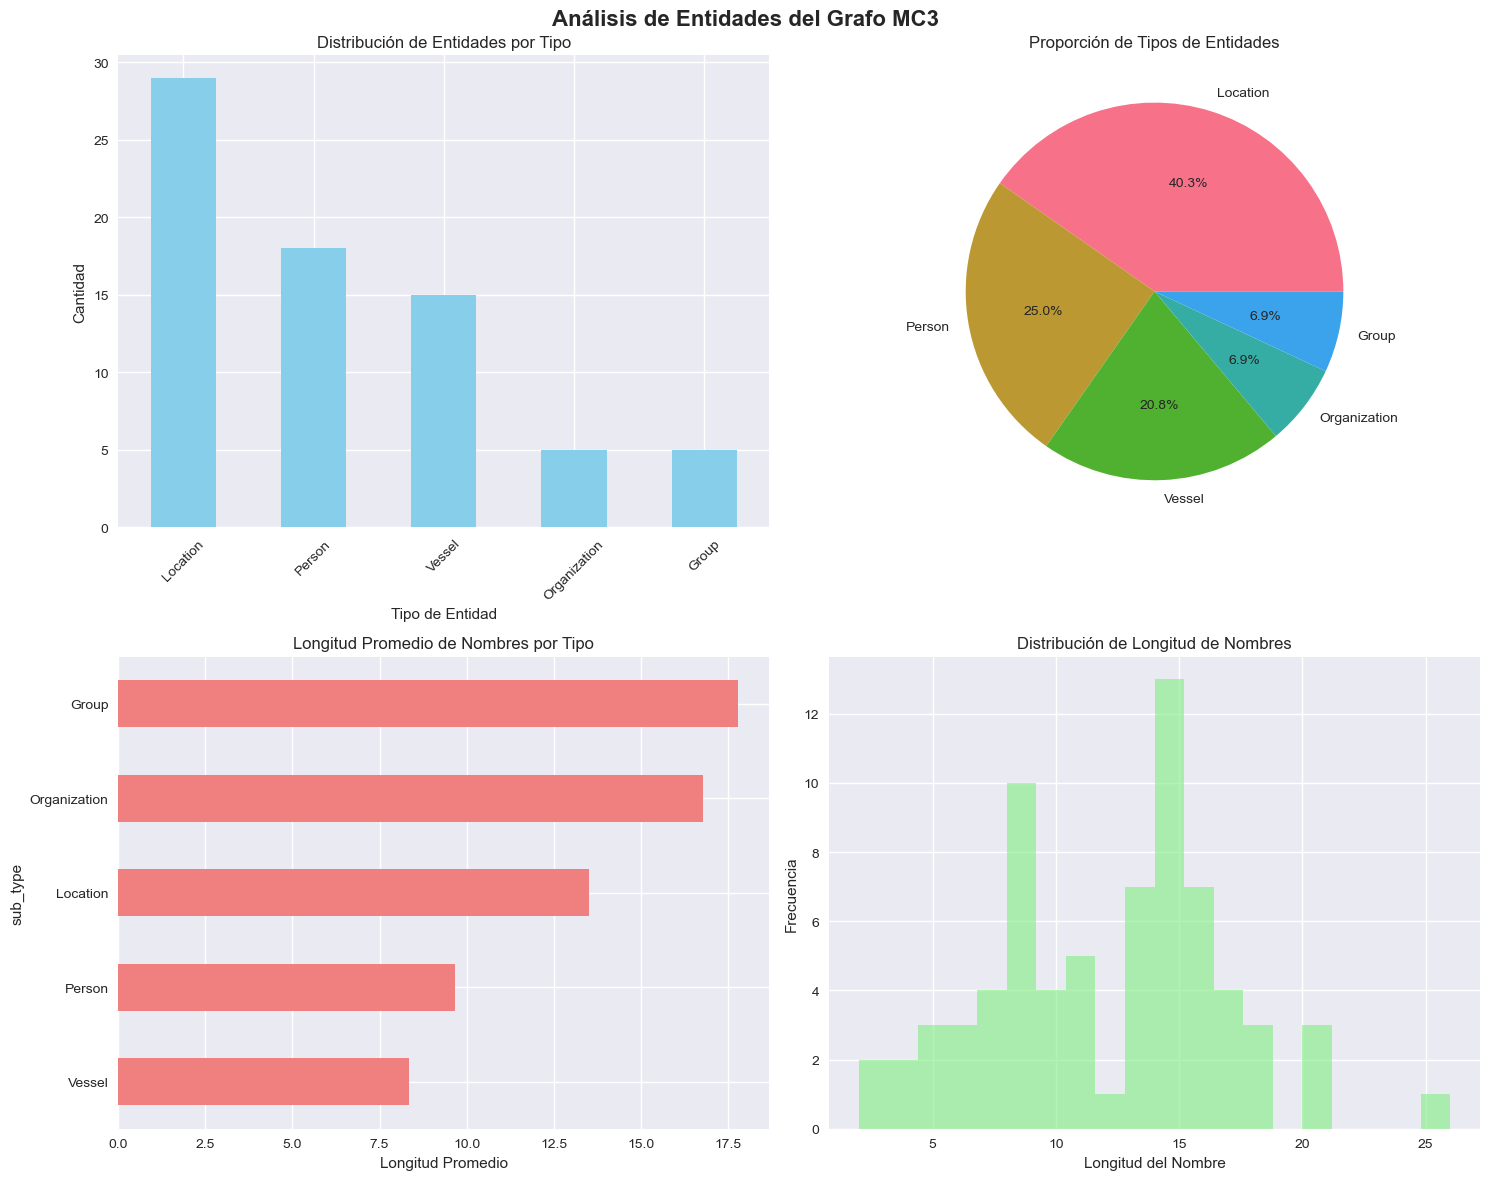


📅 ANÁLISIS DE EVENTOS

📊 Estadísticas de eventos:
Total de eventos: 802

🔍 Tipos de monitoreo:
  surveillance: 38
  patrol activity: 17
  miscellaneous monitoring: 7
  water quality testing: 5
  drone surveillance: 3

⏰ Análisis temporal:
Rango de fechas: 2023-10-14 22:00:00 a 2040-10-15 00:00:00
Duración: 6210 días


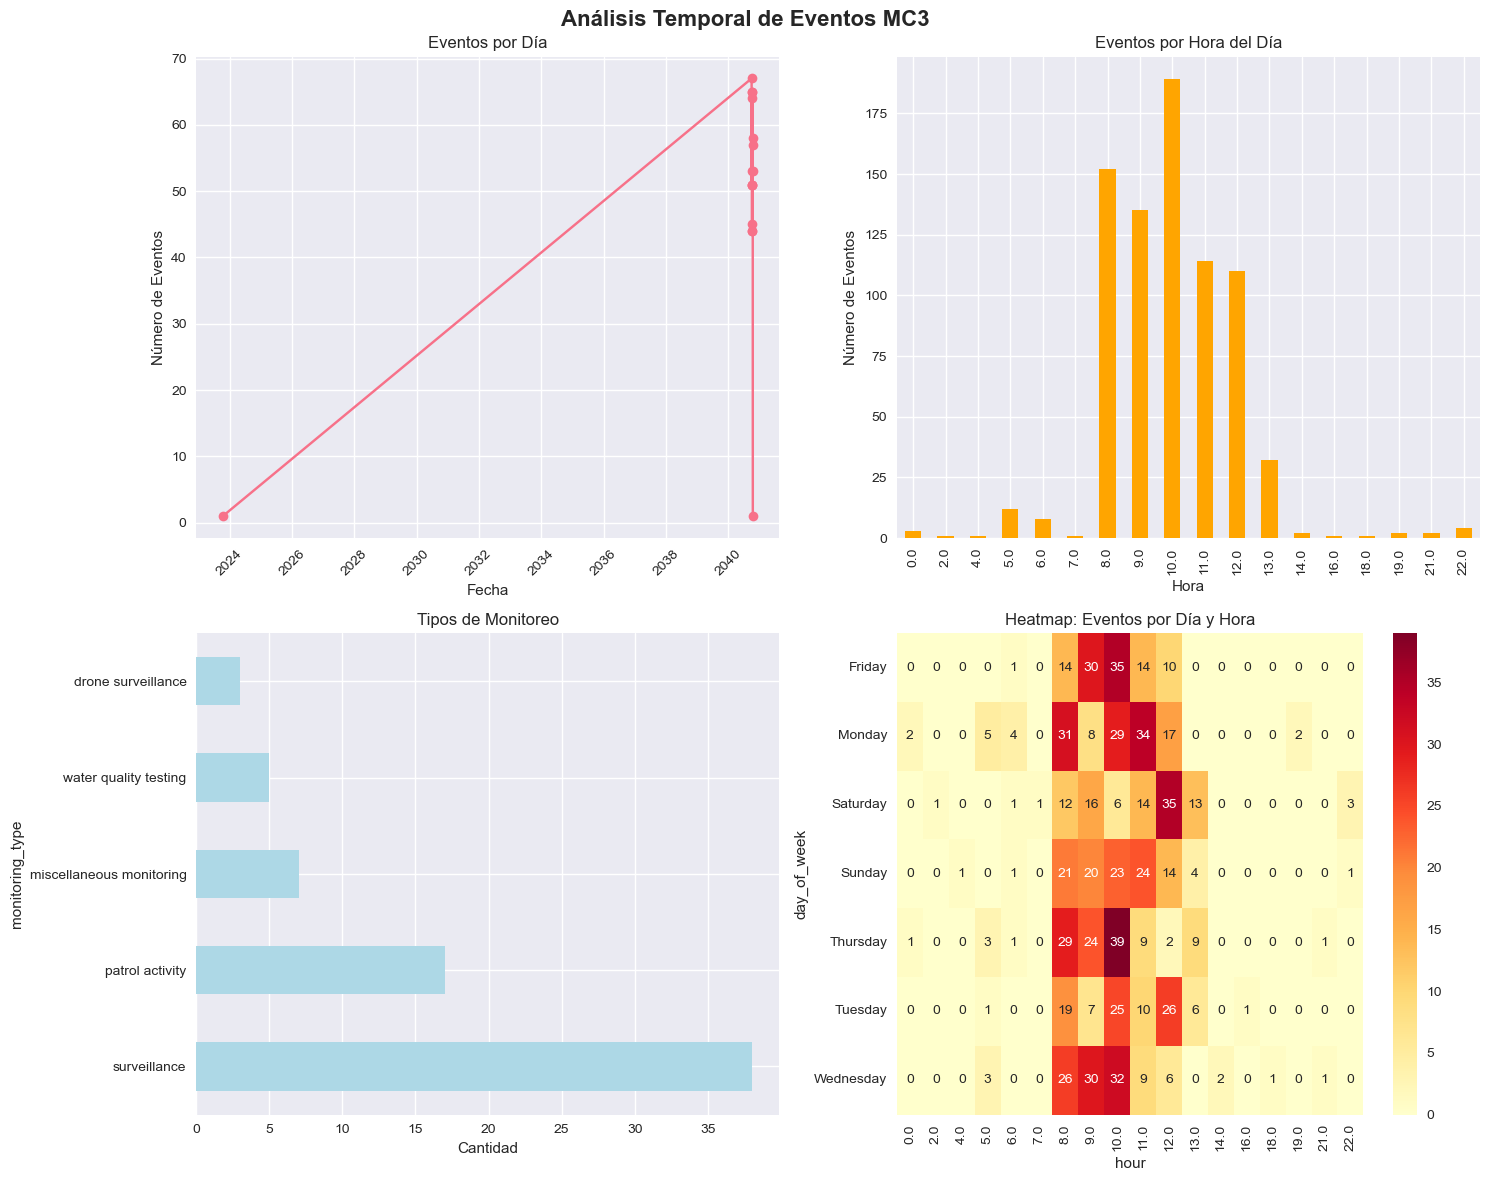


📝 ANÁLISIS DE PATRONES DE TEXTO

🔤 Palabras más frecuentes en findings:
  reef: 42
  nemo: 40
  equipment: 26
  vessels: 23
  tourism: 18
  with: 18
  near: 16
  vessel: 16
  increased: 11
  protected: 11
  boundary: 11
  environmental: 11
  activity: 10
  unauthorized: 10
  water: 9


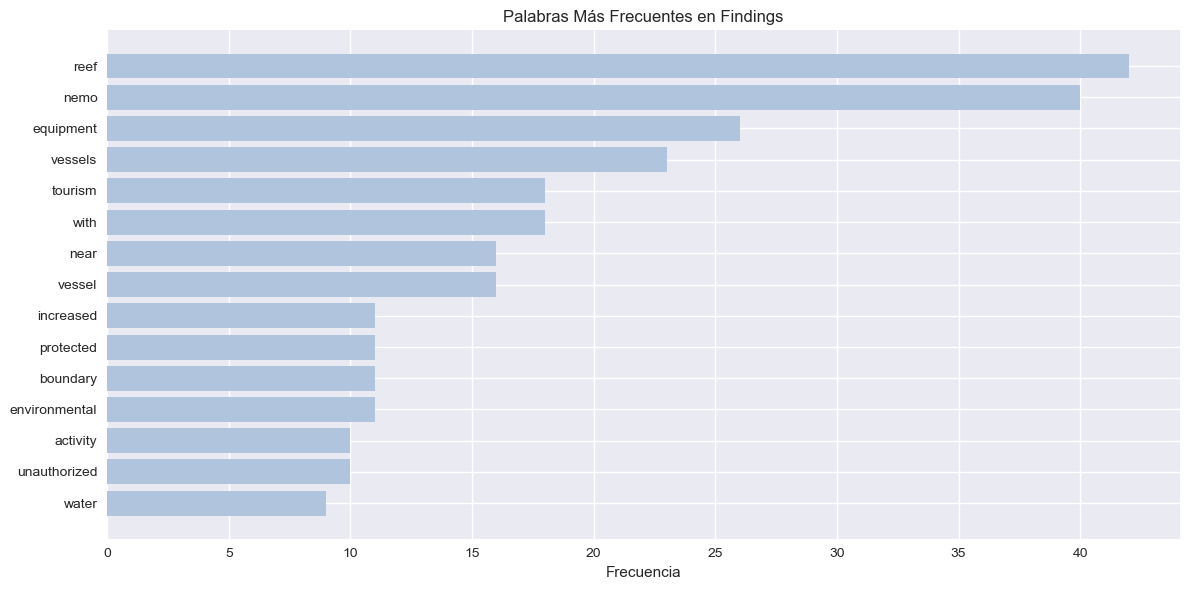


🎯 ENTIDADES CLAVE

📈 Entidades más mencionadas en eventos:
  Nemo Reef (Location): 39 menciones
  Sam (Person): 10 menciones
  Mako (Vessel): 8 menciones
  Sentinel (Vessel): 7 menciones
  Conservation Vessels (Group): 7 menciones
  Protected areas (Location): 4 menciones
  Western Boundary (Location): 4 menciones
  Eastern Boundary (Location): 4 menciones
  Neptune (Vessel): 4 menciones
  Horizon (Vessel): 3 menciones


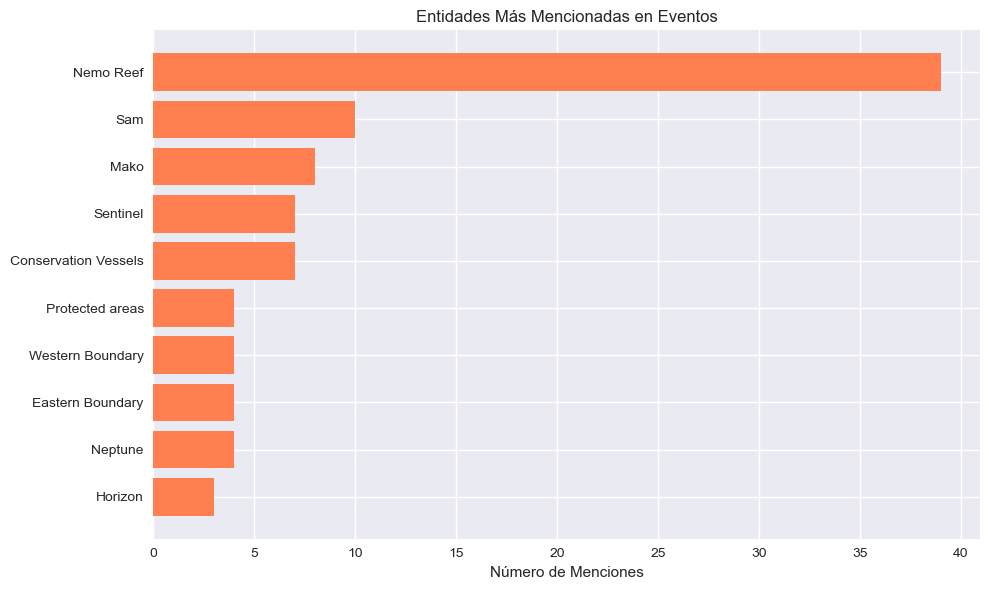


🕸️ ANÁLISIS DE RED (VISTA PREVIA)

📊 Métricas básicas de la red:
Total de nodos: 72

🔗 Distribución de tipos (indica posibles clusters):
  Location: 29 nodos (densidad: 0.403)
  Person: 18 nodos (densidad: 0.250)
  Vessel: 15 nodos (densidad: 0.208)
  Organization: 5 nodos (densidad: 0.069)
  Group: 5 nodos (densidad: 0.069)

📋 REPORTE RESUMEN DEL ANÁLISIS

🏢 ENTIDADES:
  • Total: 72
  • Tipo más común: Location (29 entidades)
  • Diversidad: 5 tipos diferentes

📅 EVENTOS:
  • Total: 802
  • Con timestamp: 770
  • Período: 6210 días
  • Promedio por día: 0.1

💡 RECOMENDACIONES PARA ANÁLISIS ADICIONAL:
  • Crear visualización de red para entender relaciones
  • Análisis de clustering para identificar comunidades
  • Análisis temporal más profundo de eventos
  • Análisis de sentiment en findings de eventos
  • Detección de anomalías en patrones temporales

✅ Análisis completado exitosamente!

📊 DataFrames disponibles:
  • explorer.nodes_df: 72 entidades
  • explorer.events_df: 802 event

In [5]:
if __name__ == "__main__":
    # Cambia esta ruta por la ruta a tu archivo JSON
    json_file = "MC3_graph.json"
    
    try:
        explorer = run_complete_eda(json_file)
        print("\n✅ Análisis completado exitosamente!")
        
        # Los DataFrames están disponibles para análisis adicional
        print(f"\n📊 DataFrames disponibles:")
        print(f"  • explorer.nodes_df: {len(explorer.nodes_df)} entidades")
        print(f"  • explorer.events_df: {len(explorer.events_df)} eventos")
        
    except FileNotFoundError:
        print(f"❌ Error: No se encontró el archivo {json_file}")
        print("Asegúrate de que el archivo esté en el directorio correcto")
    except Exception as e:
        print(f"❌ Error durante el análisis: {e}")